In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dataset.shape

(1460, 81)

In [6]:
dataset.isnull().sum()/len(dataset)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [7]:
# Checking the name of the columns
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Checking the MSSubClass column

In [8]:
dataset['MSSubClass'].isnull().sum()/len(dataset)

0.0

In [9]:
dataset['LowQualFinSF']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: LowQualFinSF, Length: 1460, dtype: int64

In [10]:
# Decsriptive analysis of SalePrice
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

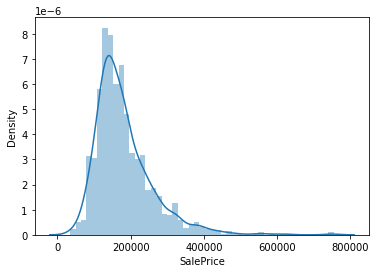

In [11]:
# Observing the distribution of the SalePrice column
sns.distplot(dataset['SalePrice'])

### From the above graph we observe the following
1. The SalePrice column is right skewed.
2. It is not a normal distribution
3. Show peakedness

In [12]:
#skewness and kurtosis
print("Skewness: %f" % dataset['SalePrice'].skew())
print("Kurtosis: %f" % dataset['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### First we look into the variables (columns) which I have intutively thought on which SalePrice column will have High dependency. The following variables,
1. MSZoning : Categorical.
2. Utilities : Categorical.
3. Neighborhood: Categorical.
4. OverallQual: Categorical. 
5. BsmtCond: Categorical.
6. TotRmsAbvGrd: Numerical.
7. GrLivArea: Numerical.

In [13]:
# Analyzing MSZoning column
dataset['MSZoning'].isnull().sum()

0

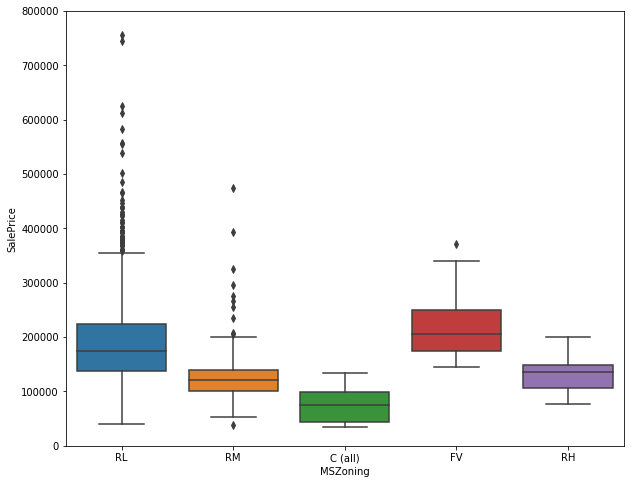

In [14]:
# box plot MSZoning Vs saleprice
col = 'MSZoning'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=col, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

From the above graph we observe the following,
1. Residential Low Density (RL) and Floating Village residential (FL) have the highest median values.
2. The variability of house prices of FL is very less compared to RL.  
3. Commercial (C) place has the lowest price for house, which is understandable because rarely people want to buy houses in commericial place.

In [15]:
# Analyzing the Utilities column
dataset['Utilities'].isnull().sum()

0

In [16]:
dataset['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

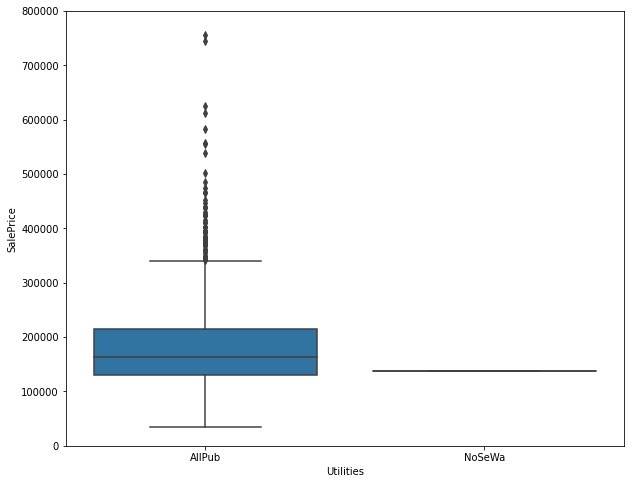

In [17]:
# box plot Utilities Vs saleprice
col = 'Utilities'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=col, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


#### From the above graph we can conclude that Utilities is not a strong factor for influence

In [18]:
# Analyzing the Neighborhood column
dataset['Neighborhood'].isnull().sum()

0

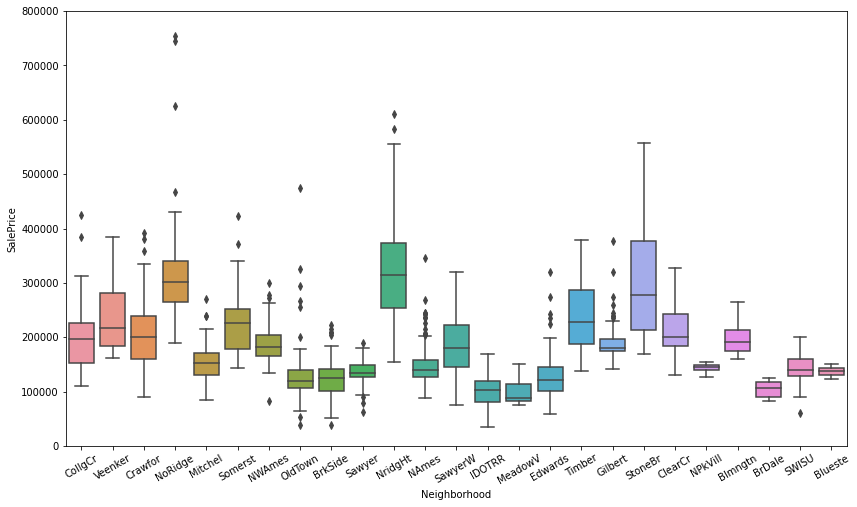

In [19]:
# box plot Neighborhood Vs saleprice
col = 'Neighborhood'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=col, y="SalePrice", data=data)
fig.set_xticklabels(fig.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=800000);

The Neighborhood column shows a medium determining factor for the price of the house. It some what interelated to the MSZoning column, but we main consider Neighborhood column becbetter details. Therefore we will be considering Neighborhood column over MSZoning column.

In [20]:
# Analyzing the OverallQual column
dataset['OverallQual'].isnull().sum()

0

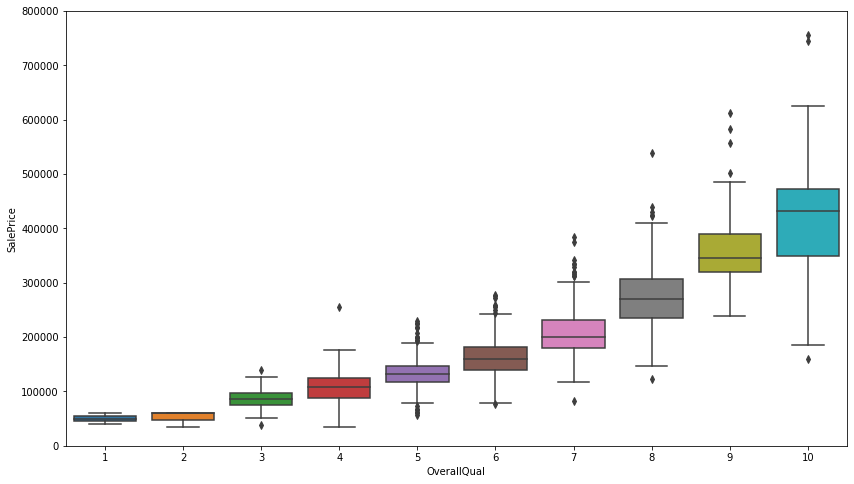

In [21]:
# box plot OverallQual Vs saleprice
col = 'OverallQual'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=col, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

From the above graph we can conclude that there is strong dependency of SalePrice on OverallQual.

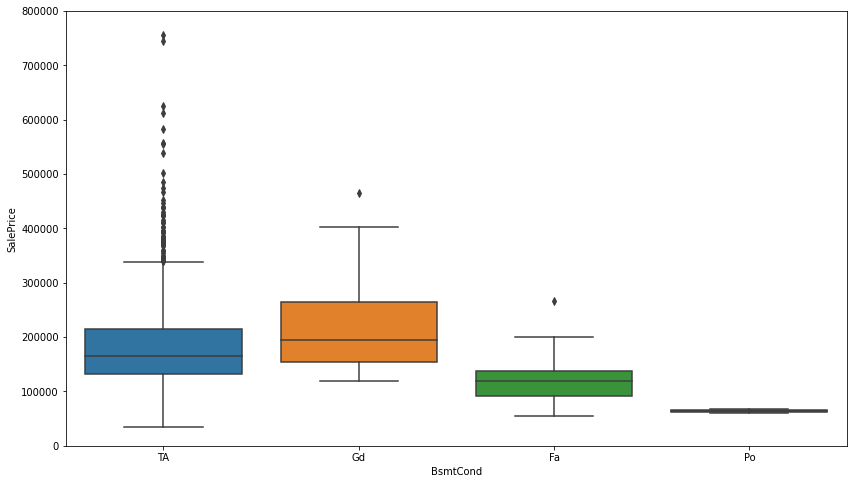

In [22]:
# box plot BsmtCond Vs saleprice
col = 'BsmtCond'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=col, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

There is medium dependecy of SalePrice on the condition of the basement

In [23]:
# Analyzing the TotRmsAbvGrd column
dataset['TotRmsAbvGrd'].isnull().sum()

0

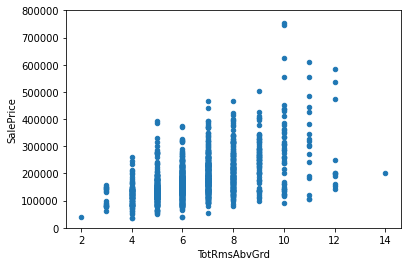

In [24]:
#scatter plot TotRmsAbvGrd vs saleprice
col = 'TotRmsAbvGrd'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000));

From the above graph we can conclude that there is medium dependency of SalePrice on TotRmsAbvGrd.

In [25]:
dataset['GrLivArea'].isnull().sum()

0

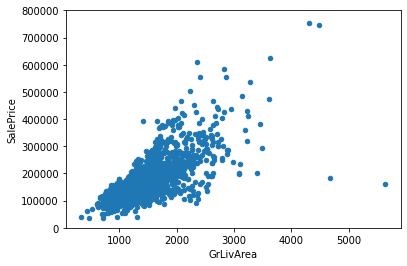

In [26]:
#scatter plot TotRmsAbvGrd vs saleprice
col = 'GrLivArea'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000));

From the aboe graph it looks like that SalePrice and GrLivArea has a linear relationship.

## Summary of above discussion
From the above observations we can conclude the following,
1. OverallQual and GrLivArea are the columns on which SalePrice has shows high dependecy.
2. MSZoning shows Medium dependecy but instead of this column we can use OverallQual.
3. Utilities and BsmtCond shows low and medium dependency.
4. TotRmsAbvGrd shows medium dependency
5. Neighborhood shows medium dependency

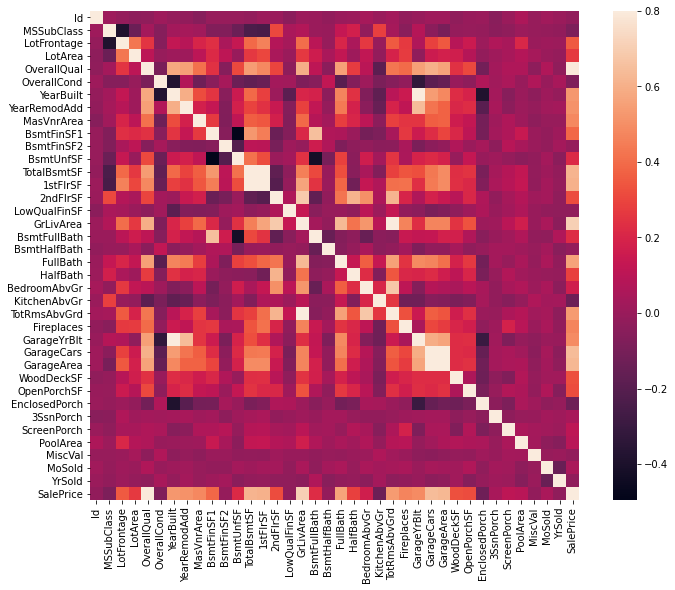

In [27]:
#correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

From the above heatmap we observe the following, **TotalBsmtSF** and **1stFlrSF** are highly correlated, **GrLivArea** is highly correlated to **TotRmsAbvGrd**, and **YearBuilt** is highly correlated to **GarageYrBlt**. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. 

### We know zoom into the columns showing highest correlation with SalePrice column. We consider top k columns

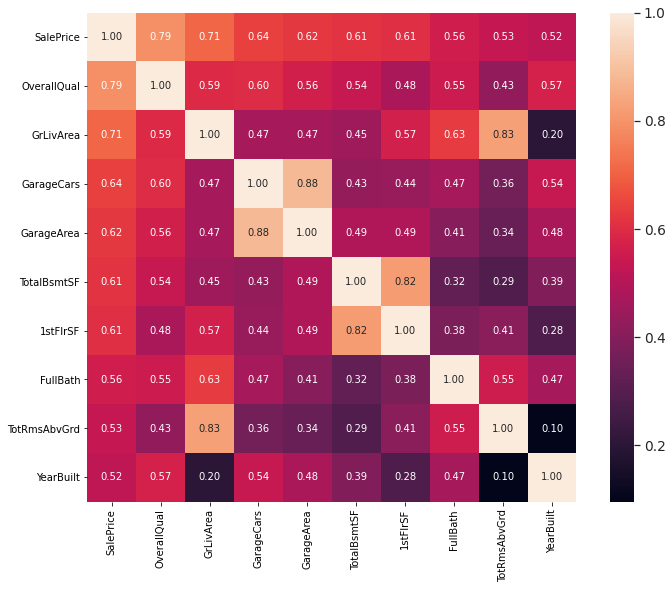

In [28]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)
plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

From the above heatmap we observe the following,
1.  The multicolineaarity is observed between following columns: GarageCars and GarageArea, TotalBsmtSF and 1stFlrSF, TotRmsAbvGrd and GridLivArea.
2. The columns OverallQual, GridLivArea, are highly correlated to SalePrice. The columns GarageCars, TotalBsmtSF, FullBath, and YearBuilt medium correlated to the SalePrice.

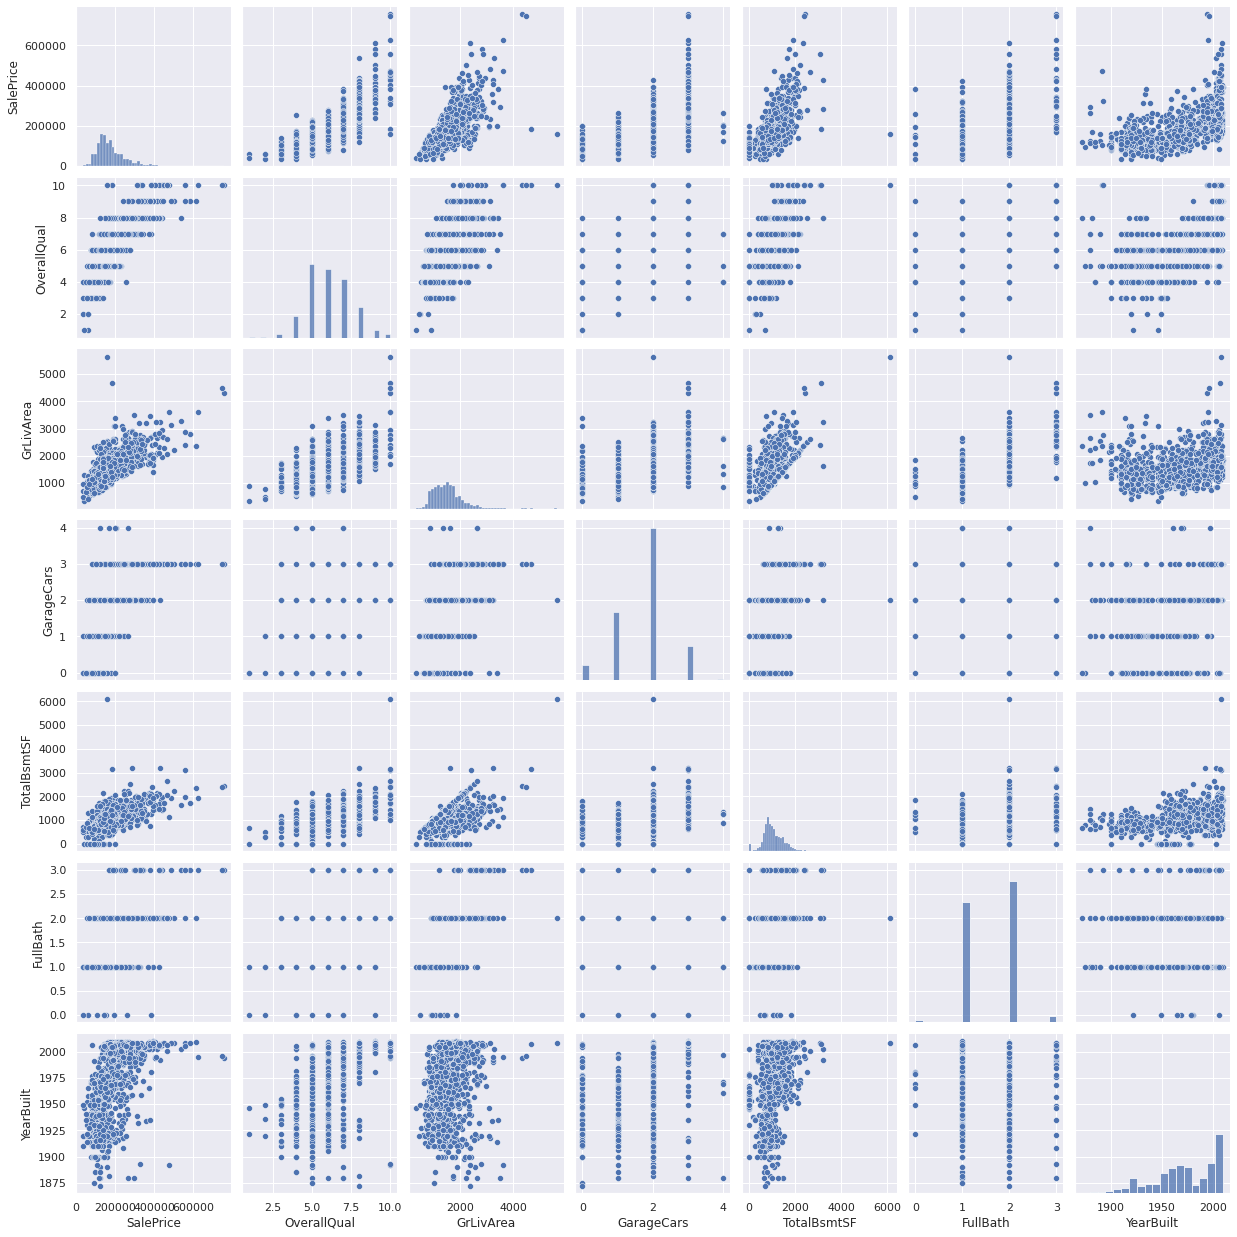

In [29]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dataset[cols], height = 2.5)
plt.show();

From the above scatter plot we observe the following,
1. One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).
2. The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud'.
3. One interesting obervation we make out from the graph between 'OverallQual' and 'GridLivArea'. We also observe that 'OverallQual' is higher for larger 'GridLivArea'.

## Dealing with Missing data

In [30]:
# Diving into the missing data analysis
null_details=dataset.isnull().sum()/len(dataset)
null_details=null_details.sort_values(ascending=False)
null_details.head(15)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
dtype: float64

In [31]:
null_details[null_details.sort_values(ascending=False)>0.75]

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
dtype: float64

In [32]:
null_details[(null_details.sort_values(ascending=False)>0.0) & (null_details.sort_values(ascending=False)<0.75)]

FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

### The rules according to which we will be dealing with missing data are as follows,
1. Dropping those columns which have more than 75% missing values and are also unimportant columns for the prediction of SalePrice. From the above analysis we found out that columns 'PoolQC', 'MiscFeature', 'Alley', and 'Fence' has more than 75% data missing. Moreover these features are not very much important will decide house prices.
2. The remaining columns with missing data doesn't influence the SalePrice prediction that much therefore we drops the columns shown in the above code cell.

In [33]:
cols=null_details[null_details.sort_values(ascending=False)==0.0].index.to_list()
dataset=dataset[cols]
dataset.head()

,Id,Functional,Fireplaces,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,TotRmsAbvGrd,...,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
0,1,Typ,0,Gd,1,3,1,2,0,8,...,150,706,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,208500
1,2,Typ,1,TA,1,3,0,2,1,6,...,284,978,Gable,CBlock,TA,TA,MetalSd,MetalSd,CompShg,181500
2,3,Typ,1,Gd,1,3,1,2,0,6,...,434,486,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,223500
3,4,Typ,1,Gd,1,3,0,1,0,7,...,540,216,Gable,BrkTil,TA,TA,Wd Shng,Wd Sdng,CompShg,140000
4,5,Typ,1,Gd,1,4,1,2,0,9,...,490,655,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,250000


In [34]:
dataset.isnull().sum().max()

0

## Checking for outliers

#### First we do univariate outlier analysis

<AxesSubplot:xlabel='SalePrice'>

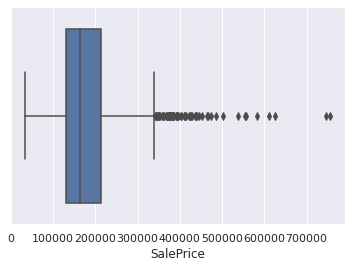

In [35]:
sns.boxplot(x=dataset['SalePrice'])

From the above we observe there many outlier according to boxplots, but the two extreme points (SalePrice > 700000) are the most extreme observation. We directly not remove these two values directly, we will be also performing bivariate outlier analysis.

#### Bivariate outlier analysis

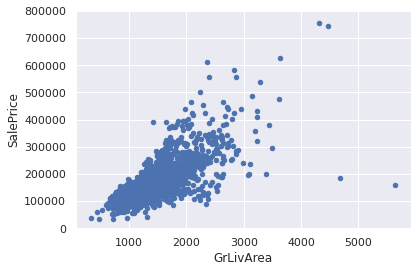

In [36]:
col = 'GrLivArea'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000));

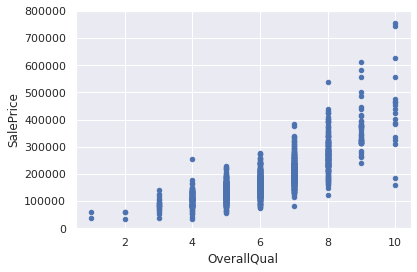

In [37]:
col = 'OverallQual'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000));

From the above two graphs we observe the following,
1. The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
2. In the graphs between 'GrLivArea' and 'SalePrice', the two obervations in the top of the plot are those points which we considered as outliers in the univariate analysis. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [38]:
#deleting points
dataset.sort_values(by = 'GrLivArea', ascending = False)[:2]
dataset=dataset.drop([dataset.index[1298], dataset.index[523]])
dataset.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,Functional,Fireplaces,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,TotRmsAbvGrd,...,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
1182,1183,Typ,2,Ex,1,4,1,3,0,10,...,300,2096,Hip,PConc,TA,Gd,ImStucc,Wd Sdng,CompShg,745000
691,692,Typ,2,Ex,1,4,1,3,1,10,...,989,1455,Gable,PConc,TA,Ex,HdBoard,HdBoard,WdShngl,755000


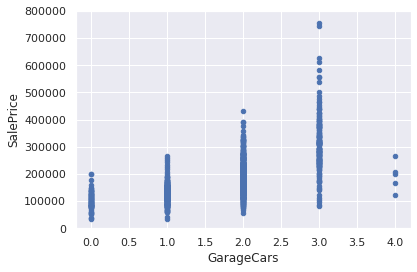

In [39]:
col = 'GarageCars'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000));

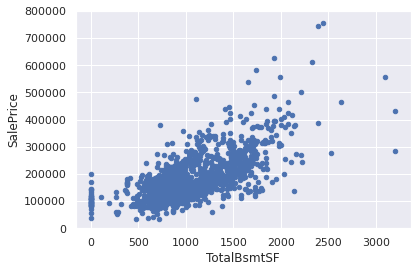

In [40]:
col = 'TotalBsmtSF'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000));

The points where 'TotalBsmtSF' > 3000 can be removed, but it kind of follows the trend. Therefore, we won't delete it.

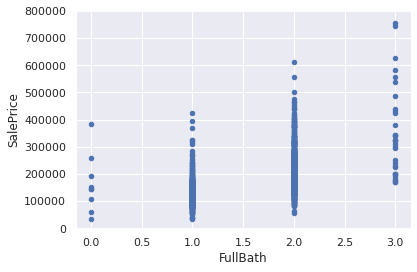

In [41]:
col = 'FullBath'
data = pd.concat([dataset['SalePrice'], dataset[col]], axis=1)
data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000));

### Now in order to do multiple linear regression we have to check the following,
According to [Hair et al. (2013)](https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/9332536503/ref=as_sl_pc_tf_til?tag=pmarcelino-20&linkCode=w00&linkId=5e9109fa2213fef911dae80731a07a17&creativeASIN=9332536503), four assumptions should be tested:

1. **Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps.If we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

2. **Homoscedasticity** - Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

3. **Linearity**- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

4. **Absence of correlated errors** - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

## First we check Normality

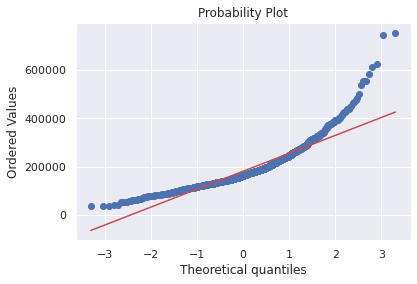

In [42]:
# Normal Q-Q plot
res = stats.probplot(dataset['SalePrice'], plot=plt)

Previously we have seen that 'SalePrice' is right (positive) skewed distribution, therefore the Normal Q-Q plot of the of the SalePrice is a not a straight line. However this problem can be rectified by 'log' transformation of the SalePrice column, and the reference is given [here](https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37).

In [43]:
dataset['log_SalePrice']=np.log(dataset['SalePrice'])

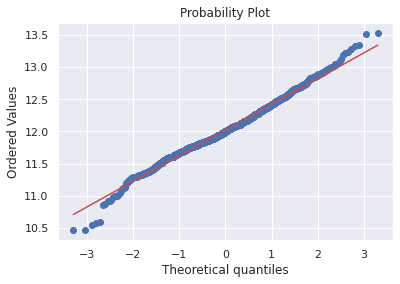

In [44]:
# Normal Q-Q plot
res = stats.probplot(dataset['log_SalePrice'], plot=plt)

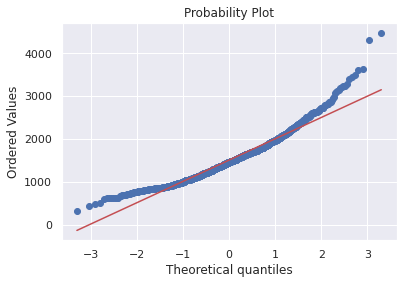

In [45]:
# Normal Q-Q plot
res = stats.probplot(dataset['GrLivArea'], plot=plt)

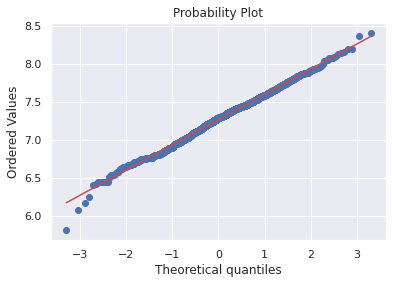

In [46]:
dataset['log_GrLivArea']=np.log(dataset['GrLivArea'])
# Normal Q-Q plot
res = stats.probplot(dataset['log_GrLivArea'], plot=plt)

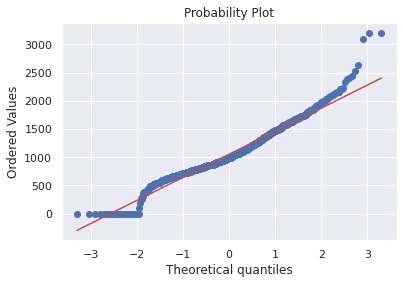

In [47]:
# Normal Q-Q plot
res = stats.probplot(dataset['TotalBsmtSF'], plot=plt)

Applying log transformation on 'TotalBsmtSF' is problematic because it may contain zero value, and 'log' of zero doesn't exist.  So first we try scaling each entry by adding 10 to 'TotalBsmtSF' and plot the Normal Q-Q plot

In [48]:
dataset['TotalBsmtSF_1']=dataset['TotalBsmtSF']+10

In [49]:
dataset[['TotalBsmtSF','TotalBsmtSF_1']]

,TotalBsmtSF,TotalBsmtSF_1
0,856,866
1,1262,1272
2,920,930
3,756,766
4,1145,1155
...,...,...
1455,953,963
1456,1542,1552
1457,1152,1162
1458,1078,1088


In [50]:
dataset['TotalBsmtSF_1'].min()

10

In [51]:
dataset['TotalBsmtSF_1']=np.log(dataset['TotalBsmtSF_1'])

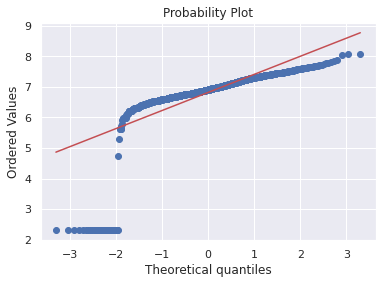

In [52]:
# Normal Q-Q plot
res = stats.probplot(dataset['TotalBsmtSF_1'], plot=plt)

From above we observe that it didn't worked as expected (to obtain a linear plot). After,brief literature we find the following approach, we'll do a 'log' transformation to all the non-zero observations, ignoring those with value zero, and the reference is given [here](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python). 

In [53]:
dataset['TotalBsmtSF_1'] = dataset['TotalBsmtSF'].apply(lambda x: np.log(x) if x > 0.0 else 0)
dataset['TotalBsmtSF_1'].head()

0    6.752270
1    7.140453
2    6.824374
3    6.628041
4    7.043160
Name: TotalBsmtSF_1, dtype: float64

In [54]:
# Changing th
dataset=dataset.rename(columns={'TotalBsmtSF_1':'log_TotalBsmtSF'})

In [55]:
dataset['log_TotalBsmtSF'].max()

8.072779333169498

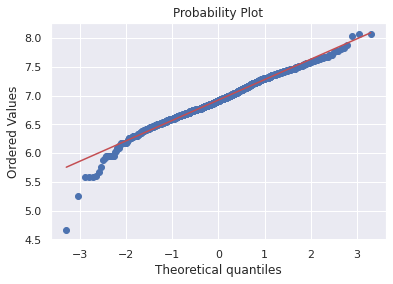

In [56]:
# Normal Q-Q plot
res = stats.probplot(dataset[dataset['log_TotalBsmtSF']>0]['log_TotalBsmtSF'], plot=plt)

## Now checking Homoscedasticity

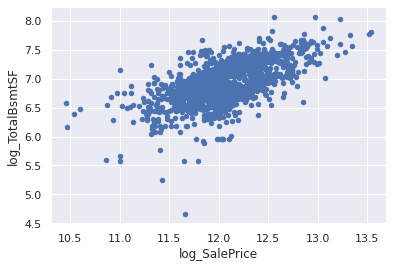

In [57]:
col = 'log_TotalBsmtSF'
data = pd.concat([dataset[dataset['log_TotalBsmtSF']>0]['log_SalePrice'], dataset[dataset['log_TotalBsmtSF']>0][col]], axis=1)
data.plot.scatter(x='log_SalePrice', y=col);

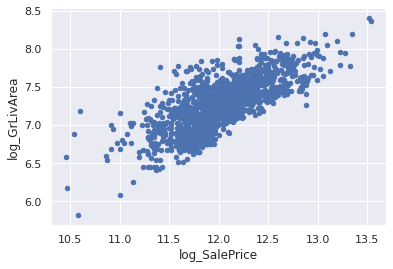

In [58]:
col = 'log_GrLivArea'
data = pd.concat([dataset['log_SalePrice'], dataset[col]], axis=1)
data.plot.scatter(x='log_SalePrice', y=col);

From the above two graphs we observe that Homoscedasticity is followed by both of the above variables

## We know split dependent and independent variables
1. First we consider the multiple linear regression (MLR) with the 'YearBuilt' column
2. There after we try with 'YearBuilt' MLR with the 'YearBuilt' column.
3. We will also other regression model

### Multiple Linear Regression without the 'YearBuilt' column
Fitting the model to the training dataset

In [59]:
X=dataset[['OverallQual','log_GrLivArea','log_TotalBsmtSF','GarageCars']].values
y=dataset['log_SalePrice'].values

In [60]:
X

array([[7.        , 7.44424865, 6.75227038, 2.        ],
       [6.        , 7.14045304, 7.14045304, 2.        ],
       [7.        , 7.48773376, 6.82437367, 2.        ],
       ...,
       [7.        , 7.75790621, 7.04925484, 1.        ],
       [5.        , 6.98286275, 6.98286275, 1.        ],
       [5.        , 7.13568735, 7.13568735, 1.        ]])

In [61]:
y

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

**Know we predict for the test dataset. So first we will import the test dataset.**

In [62]:
test_df=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [63]:
test_df[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','YearBuilt']].isnull().sum()

OverallQual    0
GrLivArea      0
TotalBsmtSF    1
GarageCars     1
YearBuilt      0
dtype: int64

We observe that 'TotalBdmtSF' and 'GarageCars' has one null element each.

In [64]:
test_df.filter(regex='^Garage',axis=1).isnull().sum()

GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
dtype: int64

**We will consider the null elements of 'GarageCars' and 'TotalBsmtSf' to be equal to zero**

In [65]:
test_df[np.isnan(test_df['GarageCars'])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [66]:
test_df.at[1116,'GarageCars']= 0

In [67]:
test_df[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','YearBuilt']].isnull().sum()

OverallQual    0
GrLivArea      0
TotalBsmtSF    1
GarageCars     0
YearBuilt      0
dtype: int64

In [68]:
test_df[np.isnan(test_df['TotalBsmtSF'])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [69]:
test_df.at[660,'TotalBsmtSF']= 0

In [70]:
test_df[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','YearBuilt']].isnull().sum()

OverallQual    0
GrLivArea      0
TotalBsmtSF    0
GarageCars     0
YearBuilt      0
dtype: int64

In [71]:
test_df['log_GrLivArea']=np.log(test_df['GrLivArea'])
test_df['log_TotalBsmtSF'] = test_df['TotalBsmtSF'].apply(lambda x:\
                                                          np.log(x) if x > 0.0 else 0)
test_df[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars']].head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars
0,5,896,882.0,1.0
1,6,1329,1329.0,1.0
2,5,1629,928.0,2.0
3,6,1604,926.0,2.0
4,8,1280,1280.0,2.0


In [72]:
test_df[['OverallQual','log_GrLivArea','log_TotalBsmtSF','GarageCars']].head()

,OverallQual,log_GrLivArea,log_TotalBsmtSF,GarageCars
0,5,6.797940,6.782192,1.0
1,6,7.192182,7.192182,1.0
2,5,7.395722,6.833032,2.0
3,6,7.380256,6.830874,2.0
4,8,7.154615,7.154615,2.0


**Constructing the test set data**

In [73]:
X_test=test_df[['OverallQual','log_GrLivArea','log_TotalBsmtSF','GarageCars']].values

#### Fitting the MLR to the training set

In [74]:
# Fitting multiple regression model to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)

LinearRegression()

#### Predicting the SalePrice using MLR model

In [75]:
y_pred=regressor.predict(X_test)
print(y_pred)

[11.60310779 11.90658261 11.96493114 ... 11.86063894 11.51588705
 12.43042942]


#### Remember we have fitted the MLR model for dependent variable, $\log$(SalePrice). Therefore, we have to transform it back to original form, so apply exponential function to it.

In [76]:
print(y_pred.min(),y_pred.max())

10.717383902881263 13.256556590271058


In [77]:
y_pred=np.exp(y_pred)
y_pred

array([109437.37931881, 148239.22114899, 157146.0863064 , ...,
       141582.65260297, 100296.59719818, 250303.49050203])

#### Creating the output dataframe

In [78]:
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
output.head()

,Id,SalePrice
0,1461,109437.379319
1,1462,148239.221149
2,1463,157146.086306
3,1464,177871.283838
4,1465,213359.354866


#### Saving the output dataframe

In [79]:
output.to_csv('.//MLR1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


***From the above MLR model, I got a root mean squared logarithmic error of 0.18243 in the test set (12214).*** 

#### Now we perform the second approach by including the column 'YearBuilt'
We first look into those enteries of the column 'YearBuilt' in test set which are not present in the training set

In [80]:
# Unique values in test_df['YearBuilt'].unique() that are not in dataset['YearBuilt'].unique()
np.setdiff1d(test_df['YearBuilt'].unique(),dataset['YearBuilt'].unique())

array([1879, 1895, 1896, 1901, 1902, 1907])

First we train MLR without one-hot encoding, directly using the 'YearBuilt' column

In [81]:
X=dataset[['OverallQual','log_GrLivArea','log_TotalBsmtSF','GarageCars','YearBuilt']].values
X.shape

(1458, 5)

In [82]:
regressor=LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [83]:
X_test=test_df[['OverallQual','log_GrLivArea','log_TotalBsmtSF',\
                'GarageCars','YearBuilt']].values

In [84]:
y_pred=regressor.predict(X_test)
print(y_pred)

[11.60859033 11.89921376 12.06290538 ... 11.84533429 11.64381696
 12.43478599]


In [85]:
y_pred=np.exp(y_pred)
y_pred

array([110039.02246028, 147150.88405344, 173321.82137025, ...,
       139432.27696456, 113984.40943041, 251396.33335343])

In [86]:
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
output.head()

,Id,SalePrice
0,1461,110039.022460
1,1462,147150.884053
2,1463,173321.821370
3,1464,190837.647940
4,1465,209664.475994


In [87]:
output.to_csv('.//MLR2_1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


***The above has improved the prediction, I got mean square logarithmic error of 0.17182 in the test set (rank is 11897).***


Now we train MLR with one-hot encoding, directly using the 'YearBuilt' column

In [88]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
yrs=np.unique(np.concatenate((test_df['YearBuilt'].unique(),dataset['YearBuilt'].unique())))
print(yrs)
len(yrs)

[1872 1875 1879 1880 1882 1885 1890 1892 1893 1895 1896 1898 1900 1901
 1902 1904 1905 1906 1907 1908 1910 1911 1912 1913 1914 1915 1916 1917
 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931
 1932 1934 1935 1936 1937 1938 1939 1940 1941 1942 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010]


118

In [90]:
# One hot encoding of the encoded years
onehotencoder = OneHotEncoder(drop='first')
onehotencoder.fit(yrs.reshape(-1,1))
cat_cols=onehotencoder.transform(X[:,4].reshape(-1,1)).toarray()
cat_cols.shape

(1458, 117)

In [91]:
print(X.shape)
# Joining two of the arrays
X=np.concatenate((X[:,0:4], cat_cols), axis=1)
del cat_cols
X.shape

(1458, 5)


(1458, 121)

In [92]:
regressor=LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [93]:
X_test=test_df[['OverallQual','log_GrLivArea','log_TotalBsmtSF',\
                'GarageCars','YearBuilt']].values
X_test

array([[5.00000000e+00, 6.79794041e+00, 6.78219206e+00, 1.00000000e+00,
        1.96100000e+03],
       [6.00000000e+00, 7.19218206e+00, 7.19218206e+00, 1.00000000e+00,
        1.95800000e+03],
       [5.00000000e+00, 7.39572161e+00, 6.83303173e+00, 2.00000000e+00,
        1.99700000e+03],
       ...,
       [5.00000000e+00, 7.10987946e+00, 7.10987946e+00, 2.00000000e+00,
        1.96000000e+03],
       [5.00000000e+00, 6.87729607e+00, 6.81563999e+00, 0.00000000e+00,
        1.99200000e+03],
       [7.00000000e+00, 7.60090246e+00, 6.90374726e+00, 3.00000000e+00,
        1.99300000e+03]])

In [94]:
cat_cols=onehotencoder.transform(X_test[:,4].reshape(-1,1)).toarray()
print(X_test.shape)
# Joining two of the arrays
X_test=np.concatenate((X_test[:,0:4], cat_cols), axis=1)
del cat_cols
X_test.shape

(1459, 5)


(1459, 121)

In [95]:
y_pred=regressor.predict(X_test)
print(y_pred)

[11.64228362 11.90687562 12.06255332 ... 11.91708378 11.61170708
 12.40877577]


In [96]:
print(y_pred.min(),y_pred.max())

-164718180794.34695 789588724115.0846


In [97]:
y_pred=np.exp(y_pred)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [98]:
print(y_pred.min(),y_pred.max())

0.0 inf


#### While using one hot encoding giving bizzare results. Let us investigate it bit further.

In [99]:
print(np.argmin(y_pred) ,np.argmax(y_pred))

142 98


In [100]:
np.where((y_pred==0.0) )

(array([ 142,  374,  757,  966, 1007, 1008, 1119]),)

In [101]:
np.where((y_pred==np.inf))

(array([ 98, 991]),)

In [102]:
test_df['YearBuilt'].iloc[[142,991,98,  374,  757,  966, 1007, 1008, 1119]]

142     1896
991     1879
98      1907
374     1902
757     1895
966     1895
1007    1901
1008    1901
1119    1895
Name: YearBuilt, dtype: int64

In [103]:
# Unique values in test_df['YearBuilt'].unique() that are not in dataset['YearBuilt'].unique()
np.setdiff1d(test_df['YearBuilt'].unique(),dataset['YearBuilt'].unique())

array([1879, 1895, 1896, 1901, 1902, 1907])

#### We observe bizzare results mainly for those values of 'YearBuilt' in the test set that are not present in the training set. The reson will be discussed here

## Now to improve the prediction further I try other models for better improvement of prediction

In [104]:
X=dataset[['OverallQual','log_GrLivArea','log_TotalBsmtSF','GarageCars','YearBuilt']].values
y=dataset['log_SalePrice'].values
print(X.shape,y.shape)

(1458, 5) (1458,)


Splitting the data into training and test set

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Now we standardize the input data

In [106]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

**First individually try out Gradient Boost Regressor, Random Forest Regressor, XGBoost Regressor, and Light Gradient Boost Regressor models.**  

In [107]:
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error

In [108]:
linear_reg=LinearRegression()
grad_boost_reg=GradientBoostingRegressor(learning_rate=0.01)
rforest_reg = RandomForestRegressor()
cat_reg=CatBoostRegressor()
lgbm_reg=LGBMRegressor(objective='regression')
xgboost_reg = xgb.XGBRegressor()
lst_mse=[]

In [109]:
# Training Gradient Boosting regressor
grad_boost_reg.fit(X_train, y_train)
y_pred=grad_boost_reg.predict(X_test)
msle=mean_squared_log_error(np.exp(y_test),np.exp(y_pred))
lst_mse.append(('Gradient Boost',msle))

In [110]:
# Training Random Forest regressor
rforest_reg.fit(X_train, y_train)
y_pred=rforest_reg.predict(X_test)
msle=mean_squared_log_error(np.exp(y_test),np.exp(y_pred))
lst_mse.append(('Random Forest',msle))

In [111]:
# Training Cat Boosting regressor
cat_reg.fit(X_train, y_train)
y_pred=cat_reg.predict(X_test)
msle=mean_squared_log_error(np.exp(y_test),np.exp(y_pred))
lst_mse.append(('Cat Boost',msle))

Learning rate set to 0.040112
0:	learn: 0.3858936	total: 54ms	remaining: 53.9s
1:	learn: 0.3759502	total: 55.1ms	remaining: 27.5s
2:	learn: 0.3664070	total: 56.1ms	remaining: 18.6s
3:	learn: 0.3570626	total: 57.1ms	remaining: 14.2s
4:	learn: 0.3479944	total: 58ms	remaining: 11.5s
5:	learn: 0.3394425	total: 59ms	remaining: 9.78s
6:	learn: 0.3314162	total: 60ms	remaining: 8.51s
7:	learn: 0.3231935	total: 61ms	remaining: 7.56s
8:	learn: 0.3159099	total: 61.9ms	remaining: 6.81s
9:	learn: 0.3083732	total: 62.9ms	remaining: 6.23s
10:	learn: 0.3012245	total: 63.8ms	remaining: 5.74s
11:	learn: 0.2945095	total: 64.7ms	remaining: 5.33s
12:	learn: 0.2881311	total: 65.6ms	remaining: 4.98s
13:	learn: 0.2819389	total: 66.6ms	remaining: 4.69s
14:	learn: 0.2760037	total: 67.5ms	remaining: 4.43s
15:	learn: 0.2704800	total: 68.4ms	remaining: 4.21s
16:	learn: 0.2647812	total: 69.4ms	remaining: 4.01s
17:	learn: 0.2594270	total: 70.5ms	remaining: 3.85s
18:	learn: 0.2549008	total: 71.5ms	remaining: 3.69s
19

In [112]:
# Training Light Gradient Boost regressor
lgbm_reg.fit(X_train, y_train)
y_pred=lgbm_reg.predict(X_test)
msle=mean_squared_log_error(np.exp(y_test),np.exp(y_pred))
lst_mse.append(('Light Gradient Boost',msle))

In [113]:
# Training Light Gradient Boost regressor
lgbm_reg.fit(X_train, y_train)
y_pred=lgbm_reg.predict(X_test)
msle=mean_squared_log_error(np.exp(y_test),np.exp(y_pred))
lst_mse.append(('Light Gradient Boost',msle))

In [114]:
# Training XGBoost regressor
xgboost_reg.fit(X_train, y_train)
y_pred=xgboost_reg.predict(X_test)
msle=mean_squared_log_error(np.exp(y_test),np.exp(y_pred))
lst_mse.append(('XGBoost',msle))

#### Second approach we take is the stacking regression technique. Stacking is an ensemble machine learning algorithm that learns how to best combine the predictions from multiple well-performing machine learning models. More details can be found [here](https://www.analyticsvidhya.com/blog/2020/12/improve-predictive-model-score-stacking-regressor/)

In [115]:
stack_reg = StackingRegressor(regressors=[linear_reg, grad_boost_reg, rforest_reg,\
                                          xgboost_reg, lgbm_reg],\
                              meta_regressor=cat_reg)

In [116]:
# Training stacked regressor
stack_reg.fit(X_train, y_train)
y_pred=stack_reg.predict(X_test)
msle=mean_squared_log_error(np.exp(y_test),np.exp(y_pred))
lst_mse.append(('Stacked regressor',msle))

Learning rate set to 0.040112
0:	learn: 0.3833816	total: 2.36ms	remaining: 2.35s
1:	learn: 0.3703187	total: 4.13ms	remaining: 2.06s
2:	learn: 0.3577936	total: 5.96ms	remaining: 1.98s
3:	learn: 0.3464070	total: 7.61ms	remaining: 1.9s
4:	learn: 0.3347828	total: 9.21ms	remaining: 1.83s
5:	learn: 0.3235070	total: 10.9ms	remaining: 1.8s
6:	learn: 0.3130977	total: 12.5ms	remaining: 1.77s
7:	learn: 0.3027414	total: 14.1ms	remaining: 1.75s
8:	learn: 0.2927019	total: 15.9ms	remaining: 1.75s
9:	learn: 0.2831874	total: 17.5ms	remaining: 1.73s
10:	learn: 0.2740363	total: 19.2ms	remaining: 1.72s
11:	learn: 0.2650360	total: 20.9ms	remaining: 1.72s
12:	learn: 0.2572412	total: 22.6ms	remaining: 1.71s
13:	learn: 0.2492949	total: 24.3ms	remaining: 1.71s
14:	learn: 0.2413257	total: 26ms	remaining: 1.71s
15:	learn: 0.2340671	total: 27.6ms	remaining: 1.7s
16:	learn: 0.2267766	total: 29.4ms	remaining: 1.7s
17:	learn: 0.2196881	total: 31.1ms	remaining: 1.7s
18:	learn: 0.2126732	total: 32.8ms	remaining: 1.69s

In [117]:
lst_mse

[('Gradient Boost', 0.05150807331678638),
 ('Random Forest', 0.022882422163089597),
 ('Cat Boost', 0.0211333215043017),
 ('Light Gradient Boost', 0.022800973374707014),
 ('Light Gradient Boost', 0.022800973374707014),
 ('XGBoost', 0.028450488914225382),
 ('Stacked regressor', 0.02907731024796794)]

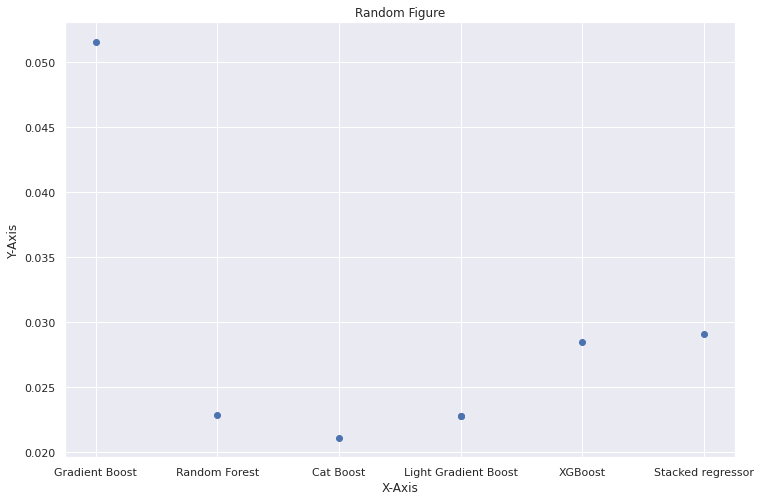

In [118]:
plt.figure(figsize=(12, 8))
plt.scatter(*zip(*lst_mse))
plt.title('Random Figure')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

In [119]:
test_df[['OverallQual','log_GrLivArea','log_TotalBsmtSF',\
         'GarageCars','YearBuilt']].head()

,OverallQual,log_GrLivArea,log_TotalBsmtSF,GarageCars,YearBuilt
0,5,6.797940,6.782192,1.0,1961
1,6,7.192182,7.192182,1.0,1958
2,5,7.395722,6.833032,2.0,1997
3,6,7.380256,6.830874,2.0,1998
4,8,7.154615,7.154615,2.0,1992


#### Standardizing (transform) the test dataset

In [120]:
test_X=sc_X.transform(test_df[['OverallQual','log_GrLivArea','log_TotalBsmtSF',\
                'GarageCars','YearBuilt']].values)
test_X

array([[-0.80409572, -1.46721884,  0.03116188, -1.02986223, -0.30867843],
       [-0.06292923, -0.244586  ,  0.39327628, -1.02986223, -0.4067312 ],
       [-0.80409572,  0.38663635,  0.07606488,  0.32546436,  0.86795485],
       ...,
       [-0.80409572, -0.49982503,  0.32058437,  0.32546436, -0.34136268],
       [-0.80409572, -1.22111893,  0.06070401, -2.38518882,  0.70453356],
       [ 0.67823726,  1.02294875,  0.13852276,  1.68079095,  0.73721782]])

**From the last figure it is quite clear that Cat Boost Regressor shows the minimum error. Therefore we are going to use it to predict the SalePrice value for the given test set**

In [121]:
test_y=np.exp(cat_reg.predict(test_X))
test_y

array([120507.24839453, 144128.50640916, 168754.97308085, ...,
       146618.80943231, 108761.74600467, 225653.09831226])

In [122]:
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': test_y})
output.head()

,Id,SalePrice
0,1461,120507.248395
1,1462,144128.506409
2,1463,168754.973081
3,1464,179770.824438
4,1465,199129.836130


In [123]:
output.to_csv('.//cat_reg.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


**From the Cat Boost regressor gave an error of 0.16437 (rank #10897)**

#### Now we are going perform hyperparameter optimization of the Cat Boost regressor

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
cat_reg.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.040111999958753586,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations':

In [126]:
cat_reg=CatBoostRegressor(verbose=False, task_type="GPU")
parameters={'iterations': [1000,3000],'learning_rate': [0.01, 0.001],\
            'depth': [4, 7, 10],'l2_leaf_reg': [1, 3, 6]}
cat_reg_grid = GridSearchCV(cat_reg, param_grid=parameters)

In [127]:
cat_reg_grid.fit(X_train,y_train)

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x7f37f9984050>,
             param_grid={'depth': [4, 7, 10], 'iterations': [1000, 3000],
                         'l2_leaf_reg': [1, 3, 6],
                         'learning_rate': [0.01, 0.001]})

In [143]:
print(cat_reg_grid.best_params_)

{'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.01}


In [129]:
y_pred=cat_reg_grid.predict(X_test)
msle=mean_squared_log_error(np.exp(y_test),np.exp(y_pred))
msle

0.02012367629604721

In [131]:
test_y=np.exp(cat_reg_grid.predict(test_X))
test_y

array([121095.08282755, 151793.47012201, 167934.62558769, ...,
       152868.64063741, 115500.32850812, 227725.07556063])

In [132]:
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': test_y})
output.head()

,Id,SalePrice
0,1461,121095.082828
1,1462,151793.470122
2,1463,167934.625588
3,1464,178711.499661
4,1465,207467.010975


In [133]:
output.to_csv('.//cat_reg_optimized.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [139]:
import pickle
import os
os.getcwd()
pickle.dump(cat_reg_grid.best_estimator_,\
            open('.//cat_reg_grid.pkl',\
                 'wb'))